<a href="https://colab.research.google.com/github/Alex-U02/Zajecia/blob/main/zaj4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

Nachylenie (a): 0.5999999999999999
Wyraz wolny (b): 2.200000000000003


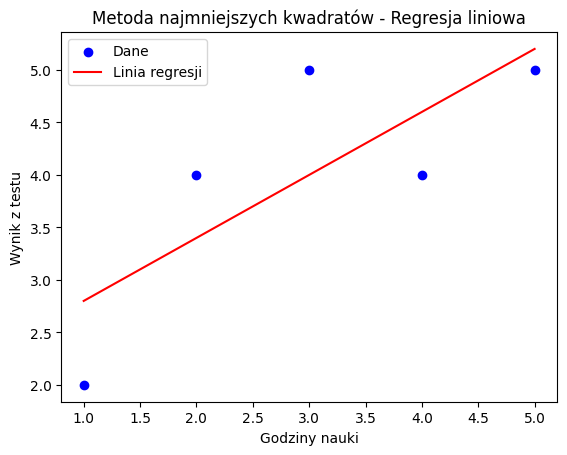

In [8]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [9]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

(np.float64(0.28284271247461895), np.float64(0.9380831519646857))

In [10]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

np.float64(0.7745966692414834)

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


Znalezione nachylenie (a): 2.1904296738893114
Znaleziony wyraz wolny (b): 5.349560516986202
Współczynnik korelacji (r): 0.3081157000217708
Błąd standardowy nachylenia: 0.2140868697585947


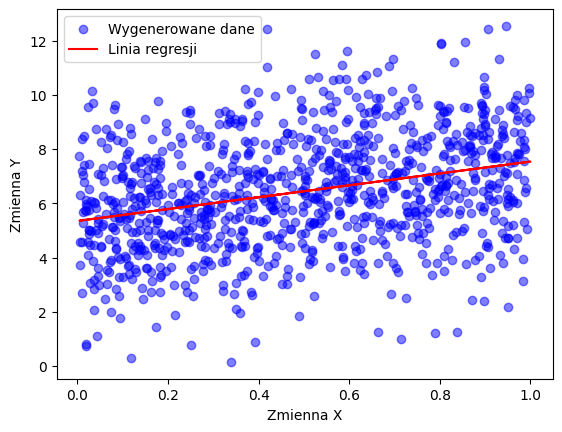

In [11]:
np.random.seed(42)
x_test = np.random.rand(1000)
true_a = 2.5
true_b = 5
y_test = true_a * x_test + true_b + np.random.normal(0, 2, 1000)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_test, y_test)

print(f"Znalezione nachylenie (a): {slope}")
print(f"Znaleziony wyraz wolny (b): {intercept}")
print(f"Współczynnik korelacji (r): {r_value}")
print(f"Błąd standardowy nachylenia: {std_err}")

plt.scatter(x_test, y_test, color='blue', label='Wygenerowane dane', alpha=0.5)
plt.plot(x_test, slope * x_test + intercept, color='red', label='Linia regresji')
plt.xlabel('Zmienna X')
plt.ylabel('Zmienna Y')
plt.legend()
plt.show()

# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

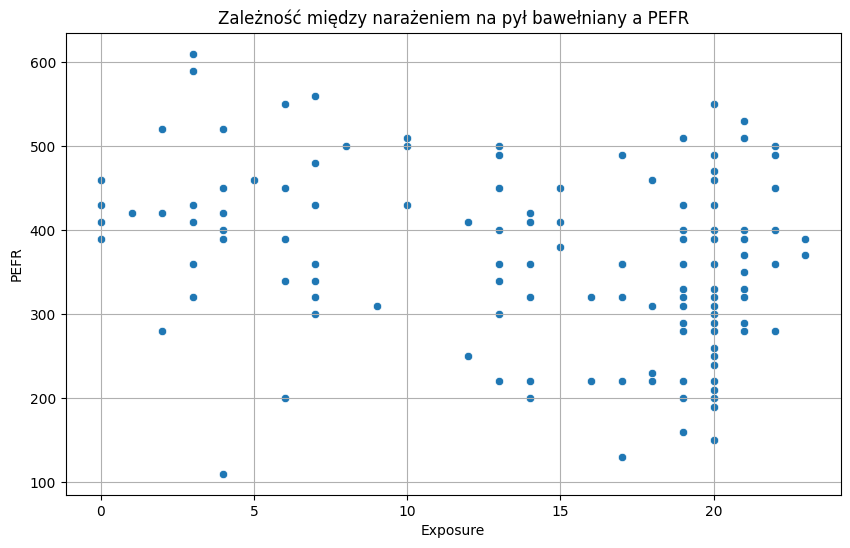


Współczynnik korelacji Pearsona między Exposure a PEFR: -0.2770217010684072
Nachylenie linii regresji: -4.1845764854614425
Wyraz wolny linii regresji: 424.582806573957


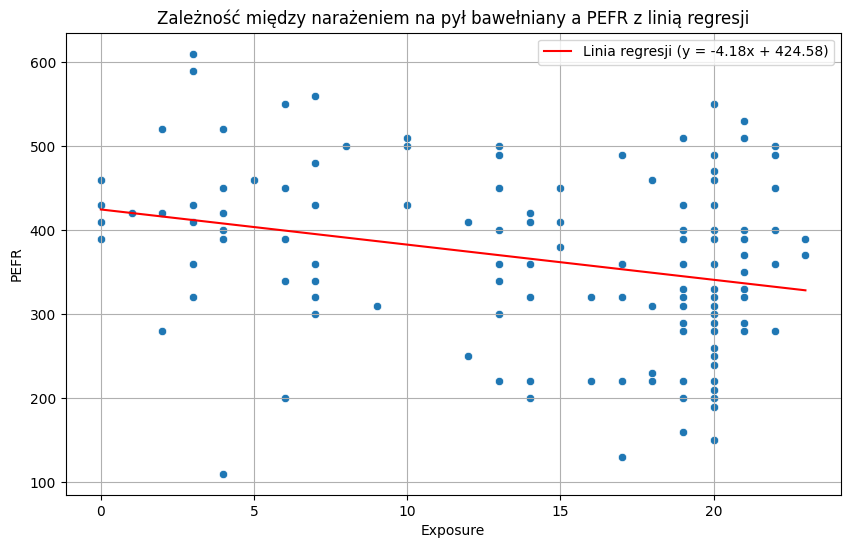


Analiza wykresu:
- Na wykresie punktowym widać wyraźny trend malejący: PEFR maleje wraz ze wzrostem Exposure.
- Widać punkty odstające od ogólnego trendu.


In [12]:
df = pd.read_csv('LungDisease.csv')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exposure', y='PEFR', data=df)
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.title('Zależność między narażeniem na pył bawełniany a PEFR')
plt.grid(True)
plt.show()

pearson_corr, _ = stats.pearsonr(df['Exposure'], df['PEFR'])
print(f"\nWspółczynnik korelacji Pearsona między Exposure a PEFR: {pearson_corr}")

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Exposure'], df['PEFR'])

print(f"Nachylenie linii regresji: {slope}")
print(f"Wyraz wolny linii regresji: {intercept}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exposure', y='PEFR', data=df)
plt.plot(df['Exposure'], slope * df['Exposure'] + intercept, color='red', label=f'Linia regresji (y = {slope:.2f}x + {intercept:.2f})')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.title('Zależność między narażeniem na pył bawełniany a PEFR z linią regresji')
plt.legend()
plt.grid(True)
plt.show()

print("\nAnaliza wykresu:")
print("- Na wykresie punktowym widać wyraźny trend malejący: PEFR maleje wraz ze wzrostem Exposure.")
print("- Widać punkty odstające od ogólnego trendu.")

# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



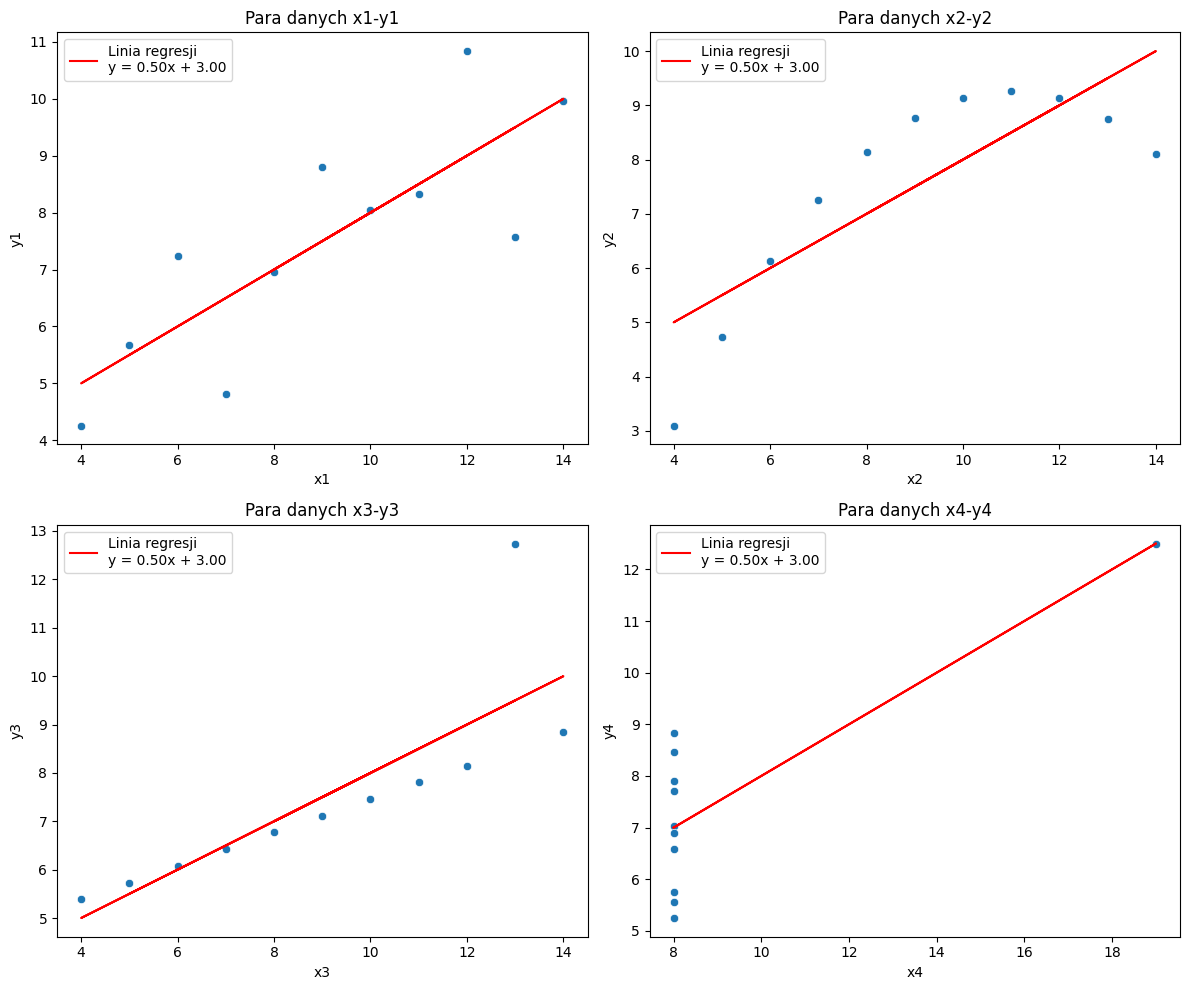

Wyniki analizy dla każdego zestawu danych:

x1-y1:
  nachylenie (a): 0.5001
  błąd standardowy a: 0.1179
  wyraz wolny (b): 3.0001
  błąd standardowy b: 1.1247
  współczynnik korelacji Pearsona: 0.8164

x2-y2:
  nachylenie (a): 0.5000
  błąd standardowy a: 0.1180
  wyraz wolny (b): 3.0009
  błąd standardowy b: 1.1253
  współczynnik korelacji Pearsona: 0.8162

x3-y3:
  nachylenie (a): 0.4997
  błąd standardowy a: 0.1179
  wyraz wolny (b): 3.0025
  błąd standardowy b: 1.1245
  współczynnik korelacji Pearsona: 0.8163

x4-y4:
  nachylenie (a): 0.4999
  błąd standardowy a: 0.1178
  wyraz wolny (b): 3.0017
  błąd standardowy b: 1.1239
  współczynnik korelacji Pearsona: 0.8165


In [15]:

df = pd.read_csv('anscombe.csv', header=None, skiprows=2)
df.columns = ["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

data_pairs = [('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3'), ('x4', 'y4')]

results = {}

for i, (x_col, y_col) in enumerate(data_pairs):
    x_data = df[x_col]
    y_data = df[y_col]


    sns.scatterplot(x=x_data, y=y_data, ax=axes[i])
    axes[i].set_title(f'Para danych {x_col}-{y_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)


    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)


    coeffs, cov_matrix = np.polyfit(x_data, y_data, 1, cov=True)
    std_err_poly = np.sqrt(np.diag(cov_matrix))
    std_err_slope_poly, std_err_intercept_poly = std_err_poly


    axes[i].plot(x_data, slope * x_data + intercept, color='red', label=f'Linia regresji\ny = {slope:.2f}x + {intercept:.2f}')
    axes[i].legend()


    pearson_corr, _ = stats.pearsonr(x_data, y_data)


    results[f'{x_col}-{y_col}'] = {
        'nachylenie (a)': slope,
        'błąd standardowy a': std_err_slope_poly,
        'wyraz wolny (b)': intercept,
        'błąd standardowy b': std_err_intercept_poly,
        'współczynnik korelacji Pearsona': pearson_corr
    }

plt.tight_layout()
plt.show()

print("Wyniki analizy dla każdego zestawu danych:")
for pair, data in results.items():
    print(f"\n{pair}:")
    for key, value in data.items():
        print(f"  {key}: {value:.4f}")